$${\Large\bf \text{Displacement and Bike Lanes In Chicago}}$$


$$\textbf{Initial Bike Racks Data}$$

$\text{This is the orginal Data I Collected on Chicago as we were trying to narrow down which city to research into}$

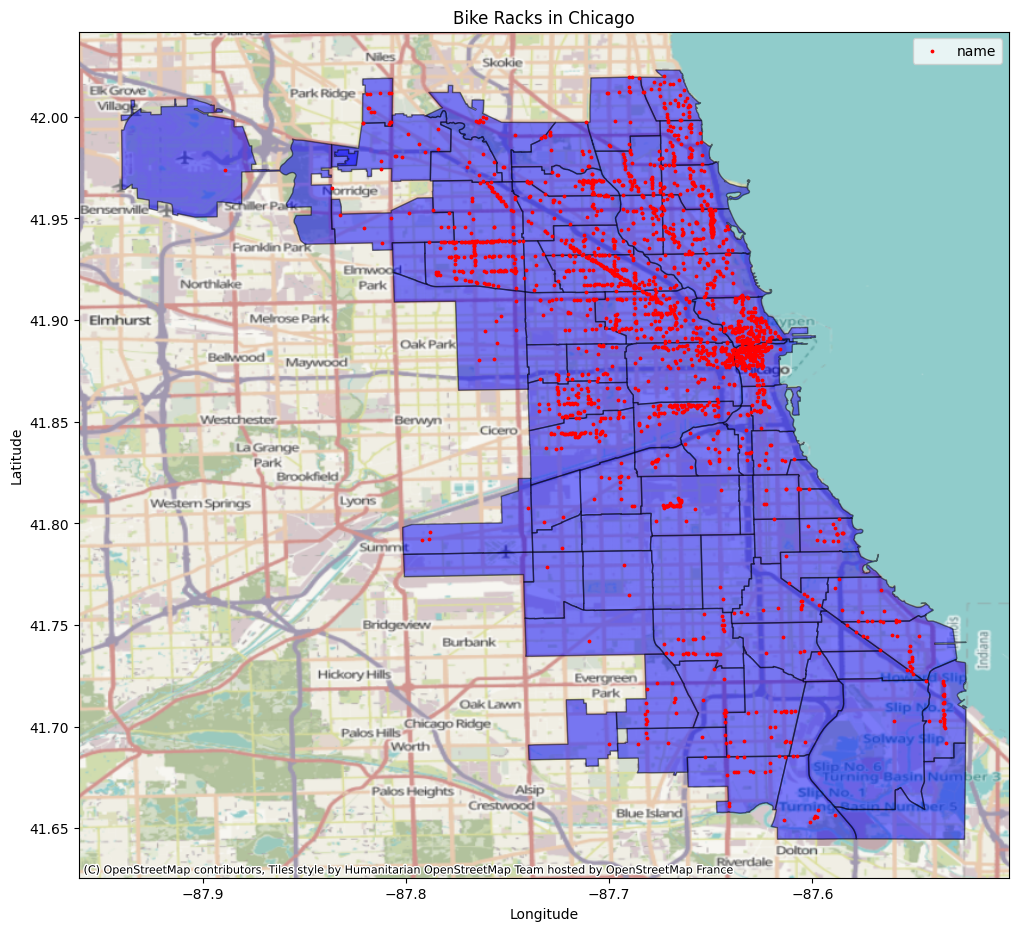

In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geodatasets
import contextily as cx

neighborhoods_gdf = gpd.read_file('../data/Bike Racks_20240421.geojson')
community_gdf = gpd.read_file(geodatasets.get_path("../data/geoda.chicago_commpop"))

fig, ax = plt.subplots(figsize=(12, 12))
community_gdf.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

neighborhoods_gdf.plot(ax=ax, color='red', markersize = 3, label='name')

# Customize plot
plt.legend()
plt.title('Bike Racks in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


cx.add_basemap(ax, crs=neighborhoods_gdf.crs.to_string(), )

plt.show()


/home/daniyal-ahmed/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_17302/2933439832.py:18: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  crime = gpd.sjoin(crime, community_gdf, op='within')


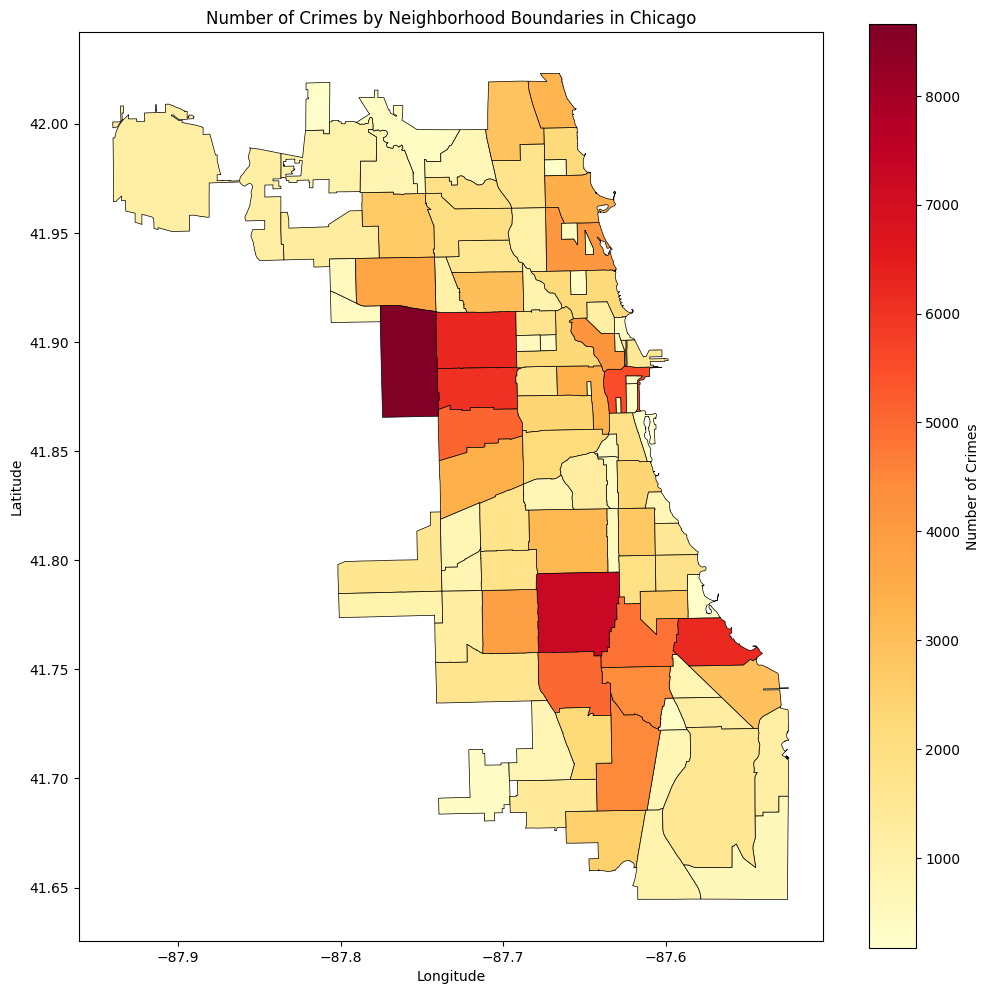

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geodatasets
import contextily as cx

crime = pd.read_csv('../data/Crimes_-_Map.csv')


crime['2023'] = crime["DATE  OF OCCURRENCE"].apply(lambda x: 1 if '2023' in x else 0)

crime = crime[crime['2023'] == 1]

community_gdf = gpd.read_file('../data/Boundaries - Neighborhoods.geojson')

crime = gpd.GeoDataFrame(crime, geometry=gpd.points_from_xy(crime.LONGITUDE, crime.LATITUDE))

crime = gpd.sjoin(crime, community_gdf, op='within')

crime_counts = crime.groupby('pri_neigh').size().reset_index(name='crime_count')

merged = community_gdf.merge(crime_counts, on='pri_neigh')

fig, ax = plt.subplots(figsize=(12, 12))
#yellow to red
merged.plot(column='crime_count', ax=ax, legend=True, legend_kwds={'label': "Number of Crimes"}, cmap='YlOrRd', edgecolor='black', linewidth=0.5)
plt.title('Number of Crimes by Neighborhood Boundaries in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

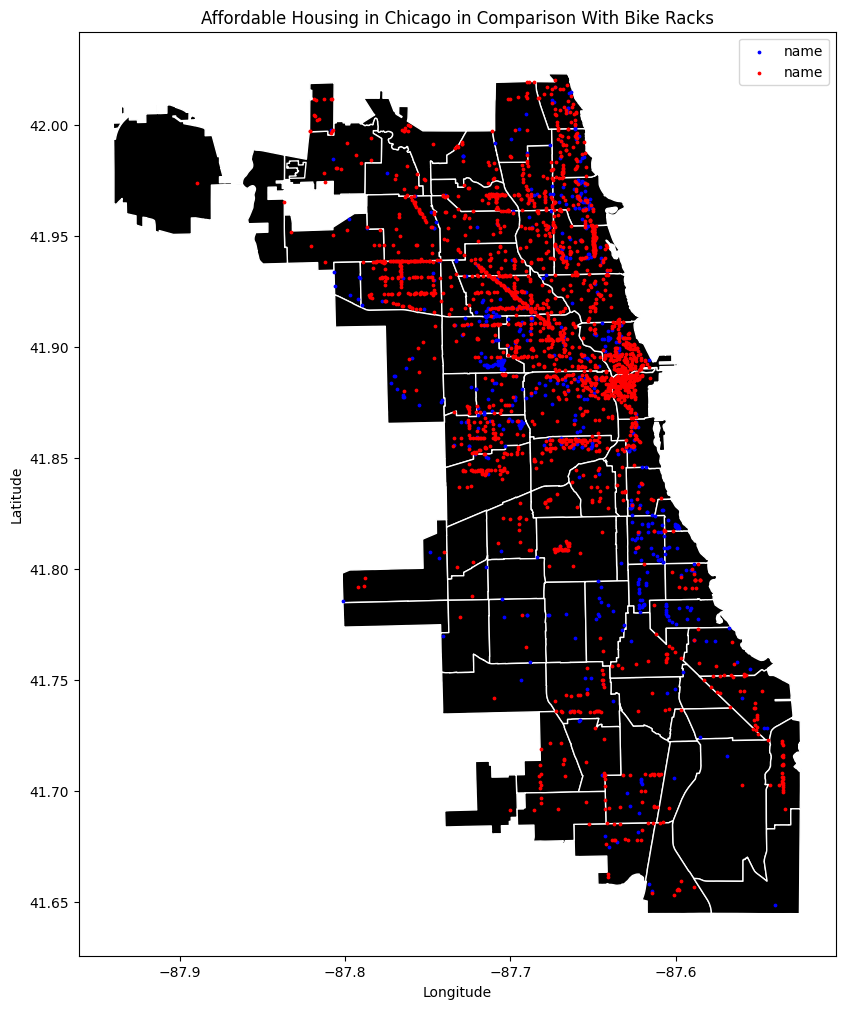

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geodatasets
import contextily as cx

housing = pd.read_csv('../data/Affordable_Rental_Housing_Developments_20240421.csv')
community_gdf = gpd.read_file(geodatasets.get_path("../data/geoda.chicago_commpop"))

housing = gpd.GeoDataFrame(housing, geometry=gpd.points_from_xy(housing.Longitude, housing.Latitude))


fig, ax = plt.subplots(figsize=(12, 12))
community_gdf.plot(ax=ax, color='black', edgecolor='white')

housing.plot(ax=ax, color='blue', markersize = 3, label='name')
neighborhoods_gdf.plot(ax=ax, color='red', markersize = 3, label='name')



# Customize plot
plt.legend()
plt.title('Affordable Housing in Chicago in Comparison With Bike Racks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')



plt.show()

$$\textbf{Divvy Bike Stations in Chicago}$$

$\text{After we had decided to Research Chicago, I made the following few graphs with Divvy Bikes using a similar approach to what we did when we researched Bluebikes}$

EPSG:4326
EPSG:4326
EPSG:4326


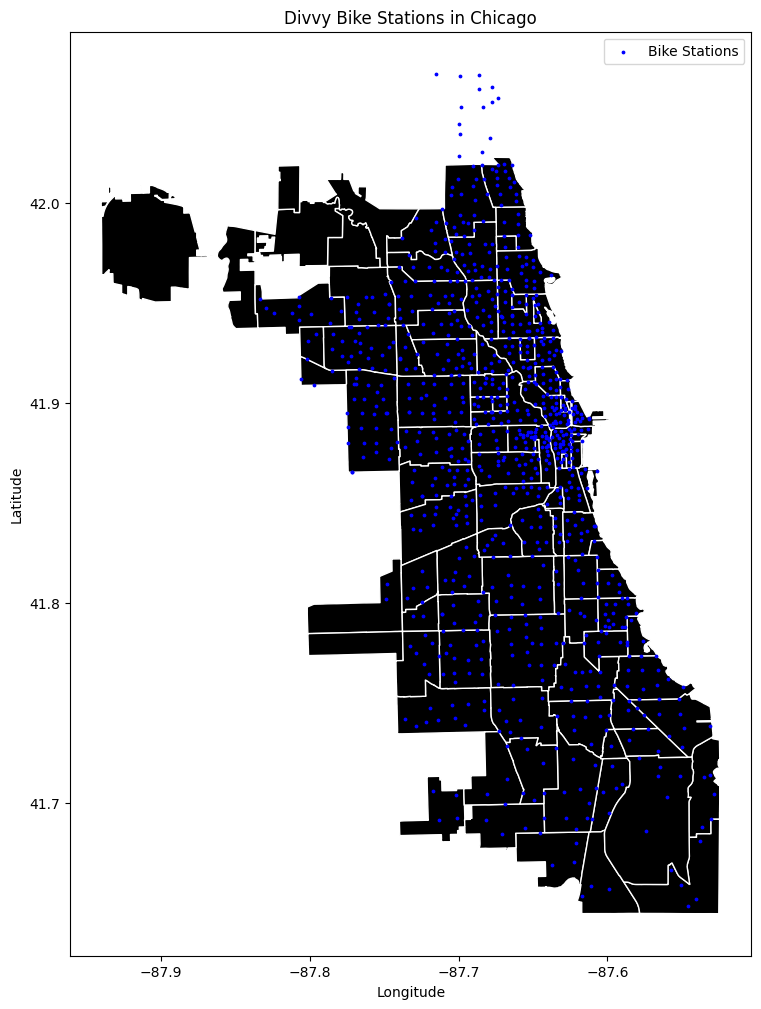

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geodatasets
import contextily as cx

Disadantaged = gpd.read_file('../data/Socioeconomically Disadvantaged Areas_20240421.geojson')
Nieghborhoods = gpd.read_file('../data/Boundaries - Neighborhoods.geojson')
Bike_stations = pd.read_csv('../data/Divvy_Bicycle_Stations_20240426.csv')


Bike_stations = gpd.GeoDataFrame(Bike_stations, geometry=gpd.points_from_xy(Bike_stations.Longitude, Bike_stations.Latitude, crs='EPSG:4326'))


print(Nieghborhoods.crs)
print(Disadantaged.crs)
print(Bike_stations.crs)

fig, ax = plt.subplots(figsize=(12, 12))
Nieghborhoods.plot(ax=ax, color='black', edgecolor='white')

Bike_stations.plot(ax=ax, color='blue', markersize = 3, label='Bike Stations')   

plt.legend()

plt.title('Divvy Bike Stations in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')



plt.show()

EPSG:4326
EPSG:4326
EPSG:4326


/tmp/ipykernel_17302/1052275455.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


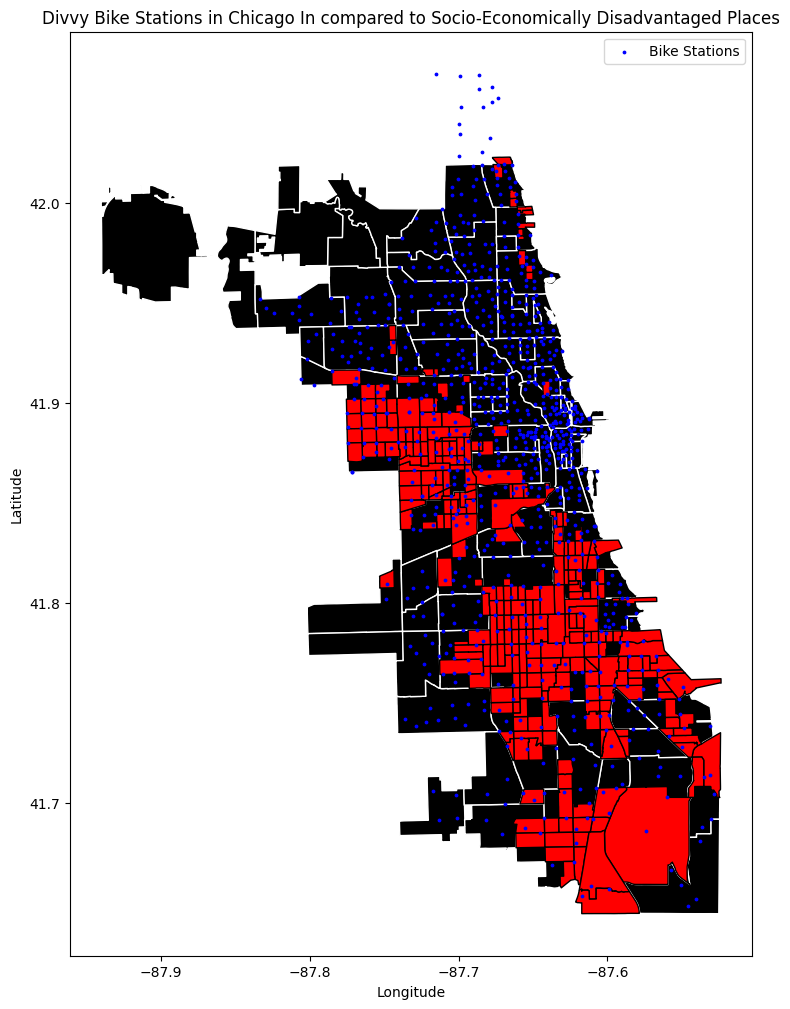

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geodatasets
import contextily as cx

Disadantaged = gpd.read_file('../data/Socioeconomically Disadvantaged Areas_20240421.geojson')
Nieghborhoods = gpd.read_file('../data/Boundaries - Neighborhoods.geojson')
Bike_stations = pd.read_csv('../data/Divvy_Bicycle_Stations_20240426.csv')


Bike_stations = gpd.GeoDataFrame(Bike_stations, geometry=gpd.points_from_xy(Bike_stations.Longitude, Bike_stations.Latitude, crs='EPSG:4326'))


print(Nieghborhoods.crs)
print(Disadantaged.crs)
print(Bike_stations.crs)

fig, ax = plt.subplots(figsize=(12, 12))
Nieghborhoods.plot(ax=ax, color='black', edgecolor='white')

Disadantaged.plot(ax=ax, color='red', markersize = 3, label='Disadvantaged_Neighborhoods', edgecolor='black')
Bike_stations.plot(ax=ax, color='blue', markersize = 3, label='Bike Stations')   

# Customize plot
plt.legend()

plt.title('Divvy Bike Stations in Chicago In compared to Socio-Economically Disadvantaged Places')
plt.xlabel('Longitude')
plt.ylabel('Latitude')



plt.show()

$\textbf{I started making a simple Dataset that was an intersection of all the data I have collected thus far}$

In [18]:
import pandas as pd
import geopandas as gpd


joined = gpd.sjoin(Nieghborhoods, Disadantaged, how='inner', op='intersects')

joined['intersection_area'] = joined.apply(
    lambda row: row['geometry'].intersection(Disadantaged.loc[row['index_right'], 'geometry']).area, axis=1)

total_intersection_area = joined.groupby('pri_neigh').intersection_area.sum()

Nieghborhoods['total_area'] = Nieghborhoods.area

Nieghborhoods = Nieghborhoods.set_index('pri_neigh').join(total_intersection_area.rename('sum_intersection_area')).reset_index()

Simple_Nieghborhoods = pd.DataFrame(Nieghborhoods[['pri_neigh', 'total_area', 'sum_intersection_area']])

Simple_Nieghborhoods['Percentage_Disadvantaged'] = (Simple_Nieghborhoods['sum_intersection_area'] / Simple_Nieghborhoods['total_area']) * 100

# Display the result
print(Simple_Nieghborhoods)

#save


/home/daniyal-ahmed/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


             pri_neigh  total_area  sum_intersection_area  \
0      Grand Boulevard    0.000488               0.000384   
1         Printers Row    0.000022                    NaN   
2        United Center    0.000328               0.000138   
3   Sheffield & DePaul    0.000106                    NaN   
4        Humboldt Park    0.001260               0.000691   
..                 ...         ...                    ...   
93      Belmont Cragin    0.001100               0.000068   
94              Austin    0.001714               0.001230   
95          Gold Coast    0.000072                    NaN   
96            Boystown    0.000034                    NaN   
97         River North    0.000391               0.000005   

    Percentage_Disadvantaged  
0                  78.670935  
1                        NaN  
2                  42.074189  
3                        NaN  
4                  54.849300  
..                       ...  
93                  6.221654  
94                 

/tmp/ipykernel_17302/334108630.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Nieghborhoods['total_area'] = Nieghborhoods.area


$\text{Graphing Percentage of Nieghborhoods that are Socio-Economically Disadvantaged}$

<Axes: xlabel='pri_neigh'>

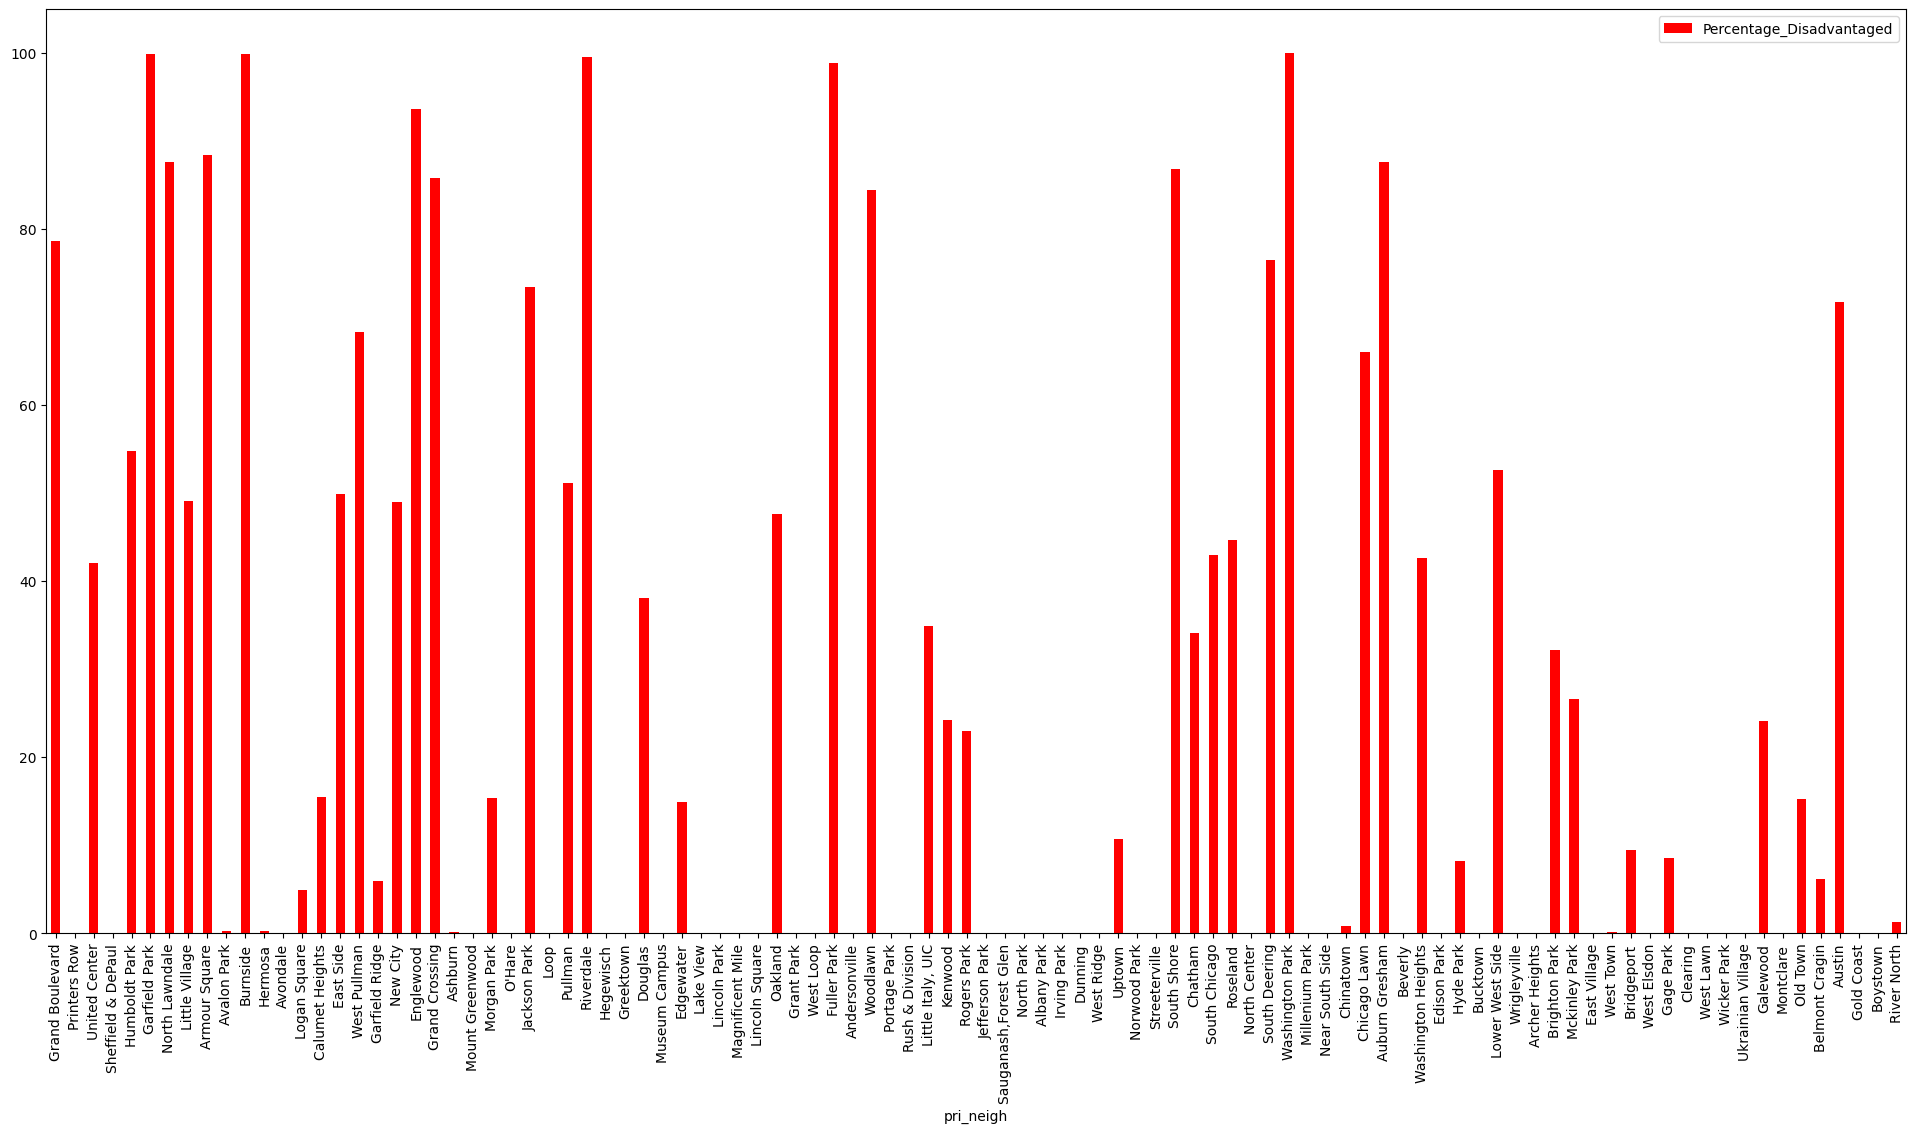

In [19]:
import matplotlib.pyplot as plt


Simple_Nieghborhoods.plot(x='pri_neigh', y='Percentage_Disadvantaged', kind='bar', figsize=(24, 12), color='red')



$\text{Found Some Census Data that I added to my Simple Dataset for better organization}$

In [20]:
Census_data = pd.read_csv('../data/eviction_data_comm_area.csv')

##Catch from the latest Cencus data
Census_data = Census_data[Census_data['census_year'] == '2014-2018 5-year estimates']

#Pri_niegh and area_name are the same column just names differently in the two datasets
Simple_Nieghborhoods = Simple_Nieghborhoods.set_index('pri_neigh').join(Census_data.set_index('area_name')).reset_index()


Simple_Nieghborhoods = Simple_Nieghborhoods.drop(columns=['area_number'])

#save the update
Simple_Nieghborhoods.to_csv('Data_for_chicago/Master_Data.csv')


<Axes: >

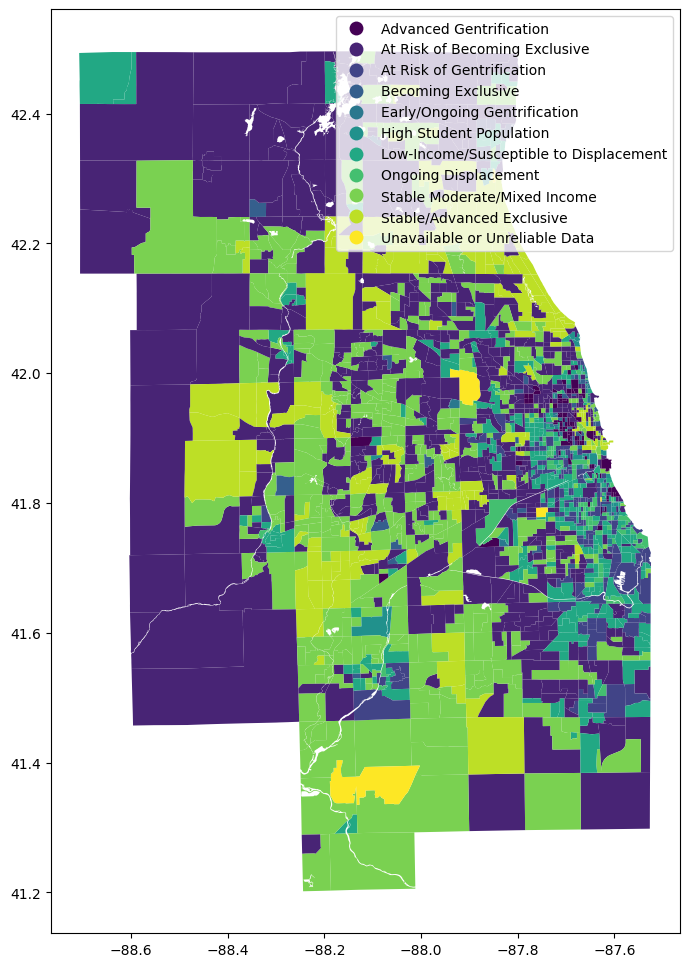

In [21]:
import pandas as pd
gdf = gpd.read_file('../data/chicago (1).gpkg', layers = 'chicago') 
fig, ax = plt.subplots(figsize=(24, 12))

gdf.plot(ax=ax, column='Typology', legend=True, cmap='viridis', figsize=(24, 12))


$\text{This took me forever to do, but basically what I am doing is using a geopandas data set and a pandas dataset that contains the}$ 
$\text{coordinates of the bike station and I am mapping the bike stations to the Typology or the are in}$

                                     ID                Station Name  \
0  a3ad5c90-a135-11e9-9cda-0a87ae2ba916    Dorchester Ave & 49th St   
1                   1571105068000485406  Narragansett & Irving Park   
2  a3b2af02-a135-11e9-9cda-0a87ae2ba916         MLK Jr Dr & 83rd St   
3  a3a57527-a135-11e9-9cda-0a87ae2ba916      Sedgwick St & Huron St   
4                   1594046405283107528        California & 16th St   

     Short Name  Total Docks  Docks in Service      Status   Latitude  \
0  KA1503000069           15                15  In Service  41.805772   
1           NaN            9                 9  In Service  41.952614   
2           586           11                11  In Service  41.743116   
3  TA1307000062           27                27  In Service  41.894666   
4           NaN            9                 9  In Service  41.859228   

   Longitude                       Location                       Typology  
0 -87.592464   POINT (-87.592464 41.805772)  At Risk of B

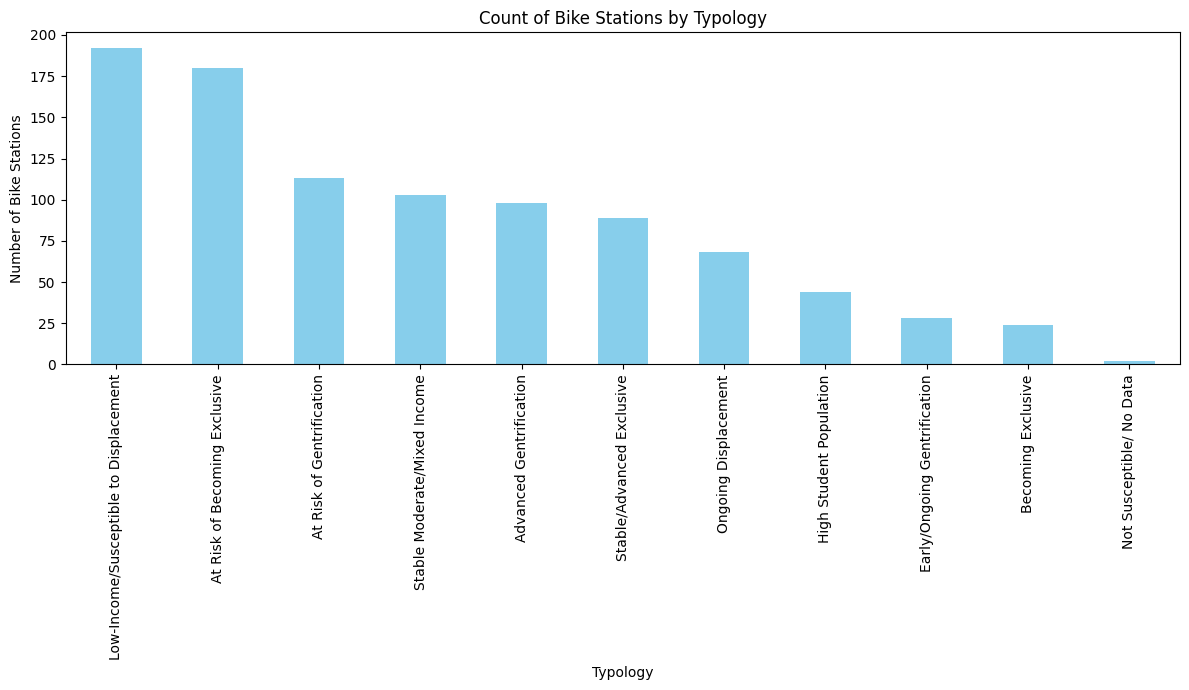

In [22]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

gdf = gpd.read_file('../data/chicago (1).gpkg', layer='chicago')
bike_stations = pd.read_csv('../data/Divvy_Bicycle_Stations_20240426.csv')

geoids = []
typologies = []

for idx, row in bike_stations.iterrows():
    
    #checks if the bike station in that area
    point_in_polygons = gdf[gdf.geometry.contains(Point(row['Longitude'], row['Latitude']))]
    
    if point_in_polygons.empty == False:
        geoid = point_in_polygons['GEOID'].values[0]  
        typology = point_in_polygons['Typology'].values[0]  
        typologies.append(typology)
    else:
        geoids.append(None)
        typologies.append(None)

bike_stations['Typology'] = typologies



print(bike_stations.head()) 


bike_stations.fillna('Not Susceptible/ No Data', inplace=True)

bike_stations['Typology'].value_counts().plot(kind='bar', figsize=(12, 7), color='skyblue')

plt.xlabel('Typology')
plt.ylabel('Number of Bike Stations')
plt.title('Count of Bike Stations by Typology')
plt.xticks(rotation=90)  #They overlap otherwise
plt.tight_layout()  

$\text{If this code looks similar is because I used it earlier in the Jupyter notebook, not much as changed except for now I am plotting Bike routes instead}$

/tmp/ipykernel_17302/1558284203.py:9: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


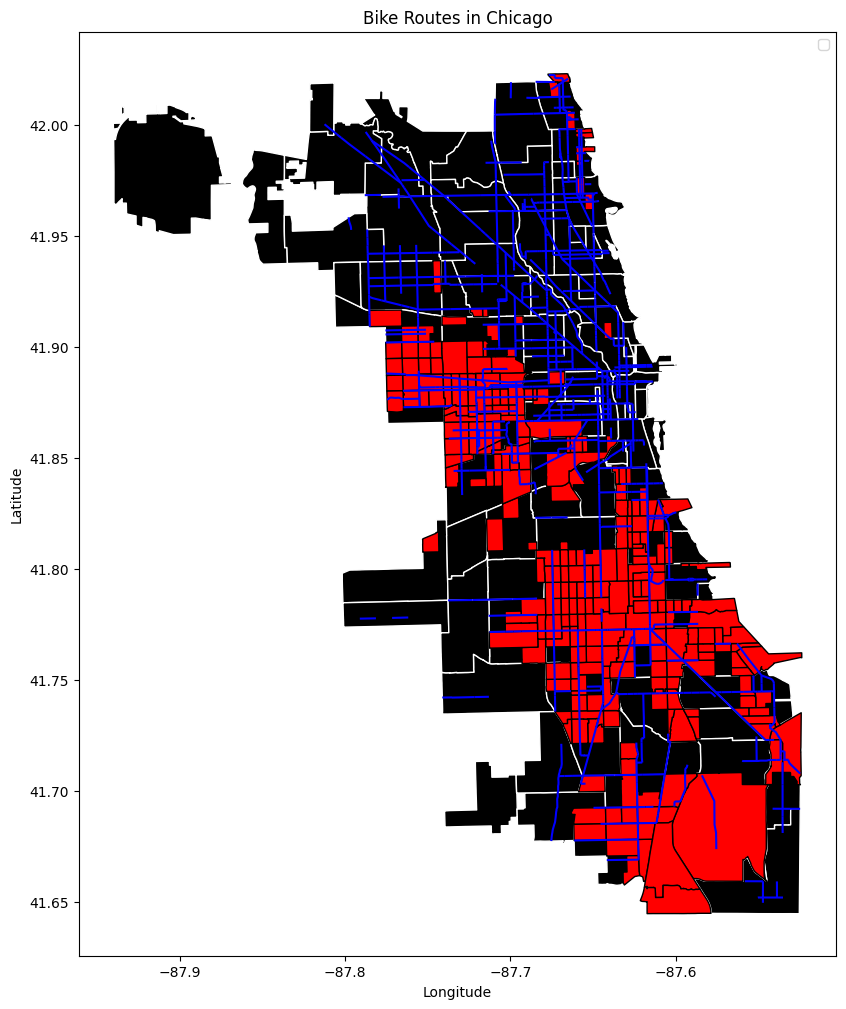

In [23]:

Nieghborhoods = gpd.read_file('../data/Boundaries - Neighborhoods.geojson')
Bike_routes = gpd.read_file('../data/Bike Routes (1).geojson')

fig, ax = plt.subplots(figsize=(12, 12))
Nieghborhoods.plot(ax=ax, color='black', edgecolor='white')
Bike_routes.plot(ax=ax, color='blue')
Disadantaged.plot(ax=ax, color='red', markersize = 3, label='Disadvantaged_Neighborhoods', edgecolor='black')

plt.legend()

plt.title('Bike Routes in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')



plt.show()



$\text{I pulled this code from our Mid-Semester Report, My teammate asked me If I could make a similar to one I made in the past, }$

In [24]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import folium





travel_df = pd.read_csv('../data/Bike_routes_latest_non_sub.csv')  


travel_df = travel_df[travel_df['from_latitude'] != travel_df['to_latitude']]
travel_df = travel_df[travel_df['from_longitude'] != travel_df['to_longitude']]

travel_df = travel_df.sample(n=100)
geometry = [LineString([(row['from_longitude'], row['from_latitude']), 
                        (row['to_longitude'], row['to_latitude'])]) for idx, row in travel_df.iterrows()]
routes_gdf = gpd.GeoDataFrame(travel_df, geometry=geometry, crs='EPSG:4326')

neighborhoods_gdf = gpd.read_file('../data/Boundaries - Neighborhoods.geojson')   



map_boston = folium.Map(location=[41.8826, -87.6226], zoom_start=12)

folium.GeoJson(
    neighborhoods_gdf,
    name='Neighborhoods',
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.3,
    }
).add_to(map_boston)

for _, row in routes_gdf.iterrows():
    folium.PolyLine(
        locations=[
            [row.geometry.coords[0][1], row.geometry.coords[0][0]],
            [row.geometry.coords[1][1], row.geometry.coords[1][0]]
        ],
        color='blue',
        weight=3,
        opacity=0.8
    ).add_to(map_boston)

map_boston

map_boston.save('chicago_routes.html')


$\text{Demographic Data }$

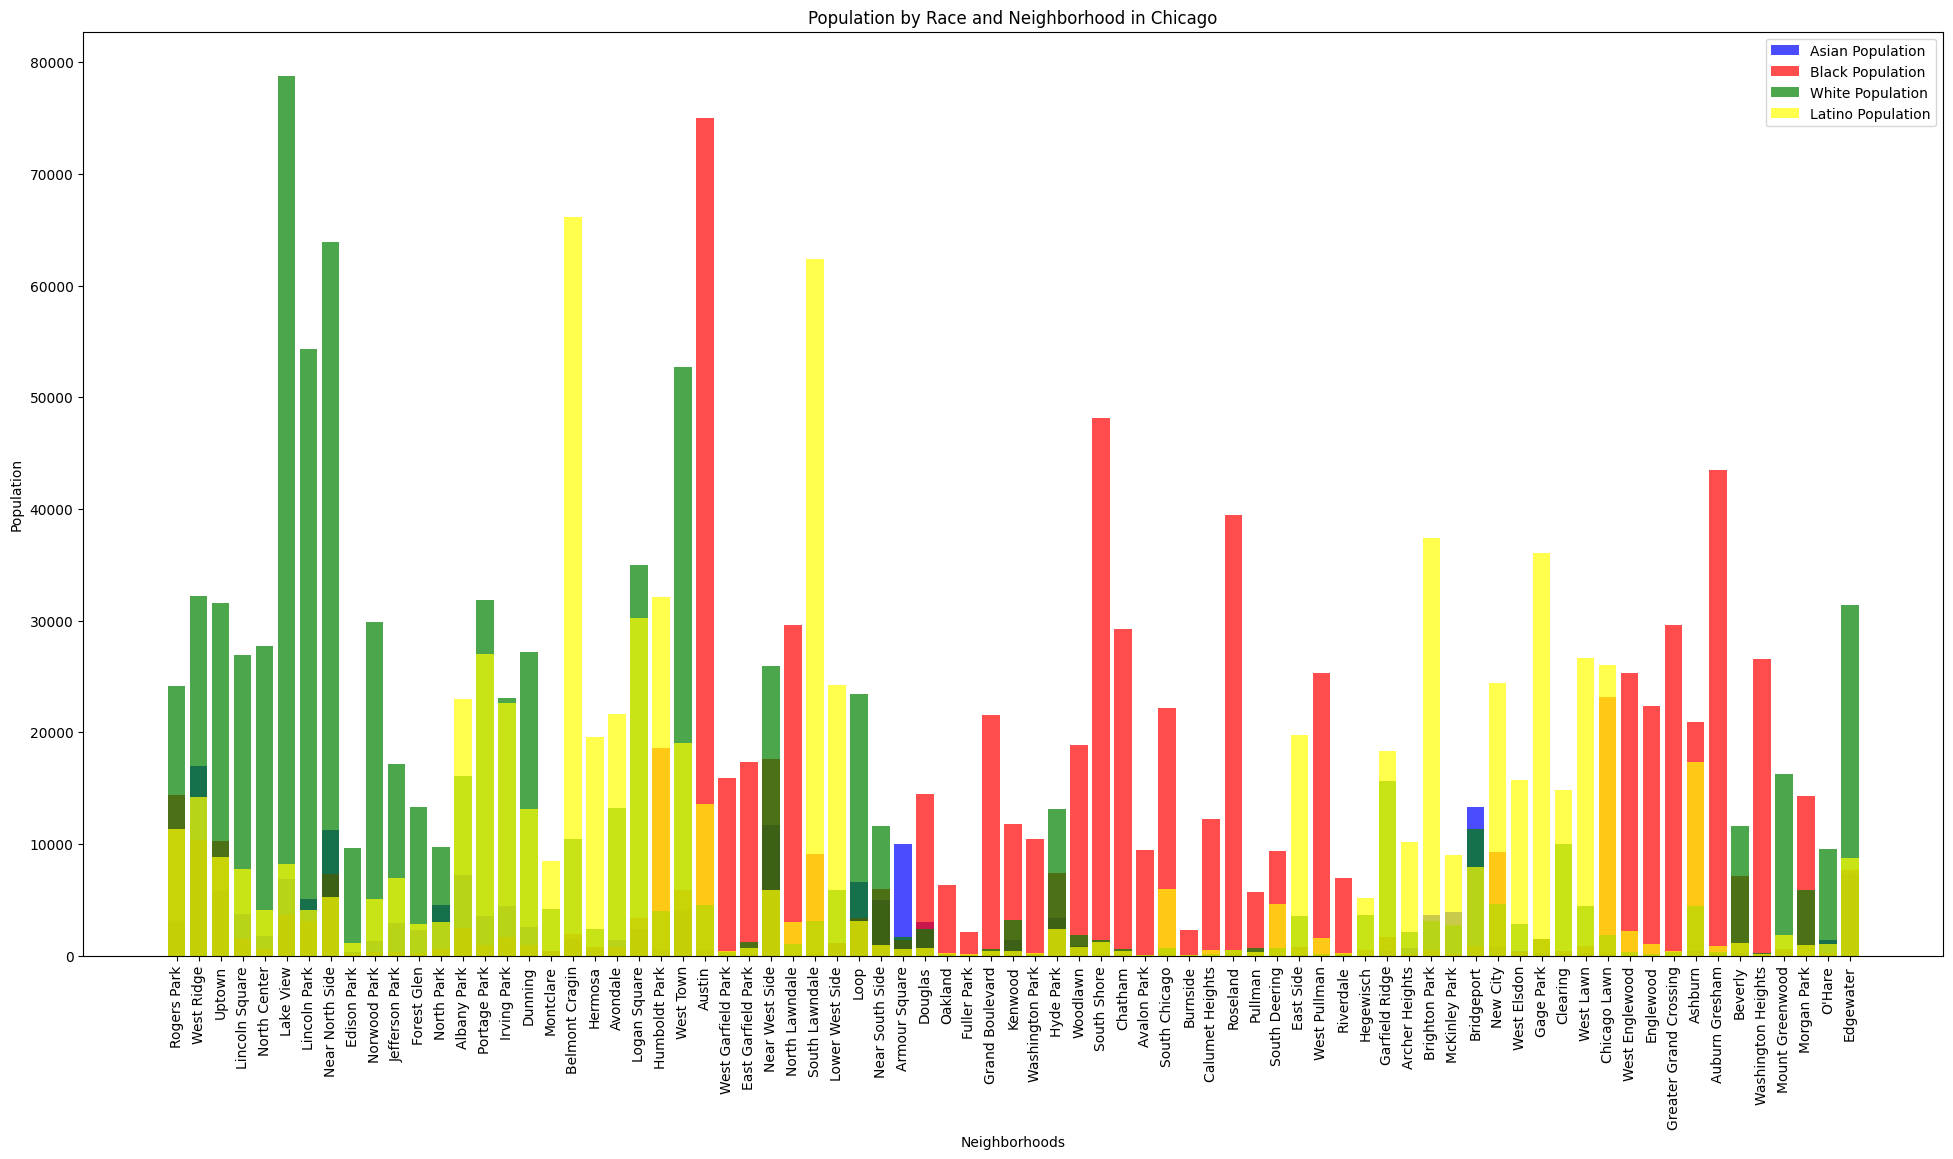

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

Census_data = pd.read_csv('../data/eviction_data_comm_area.csv')

#One again Catch the latest Data
Census_data = Census_data[Census_data['census_year'] == '2014-2018 5-year estimates']

pos = range(len(Census_data['area_name']))  

fig, ax = plt.subplots(figsize=(24, 12))

#Transparency makes the map easier to look at and just prettier so that is why I set alpha
ax.bar(pos, Census_data['population_race_asian'], label='Asian Population', color='blue', alpha=0.7)
ax.bar(pos, Census_data['population_race_black'], label='Black Population', color='red', alpha=0.7)
ax.bar(pos, Census_data['population_race_white'],  label='White Population', color='green', alpha=0.7)
ax.bar(pos, Census_data['population_race_latinx'] ,label='Latino Population', color='yellow', alpha=0.7)

ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Population')
ax.set_title('Population by Race and Neighborhood in Chicago')
ax.set_xticks(pos)
ax.set_xticklabels(Census_data['area_name'], rotation=90) 
ax.legend()

plt.show()
